# Project 2020

These are my solutions to the Project for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

This is a Jupyter notebook that trains a model using the dataset. In the notebook I will explain my model and give an analysis of its accuracy.

## Dataset

Import the required modules and have a look at the dataset.

In [1]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Machine Learning- split dataset
from sklearn.model_selection import train_test_split

# Plotting.
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Neural networks.
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Data set.
df = pd.read_csv("powerproduction.csv")
# Numpy array
data = df.values

In [4]:
# Preview the first 10 lines of the loaded data 
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [5]:
# Statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We have two columns in the dataset- *speed* and *power*. There is 500 values in both columns. The column *speed* has values between 0 to 25, and the column *power* has values between 0 to 113.556. 

## Plot the dataset

<AxesSubplot:xlabel='speed', ylabel='power'>

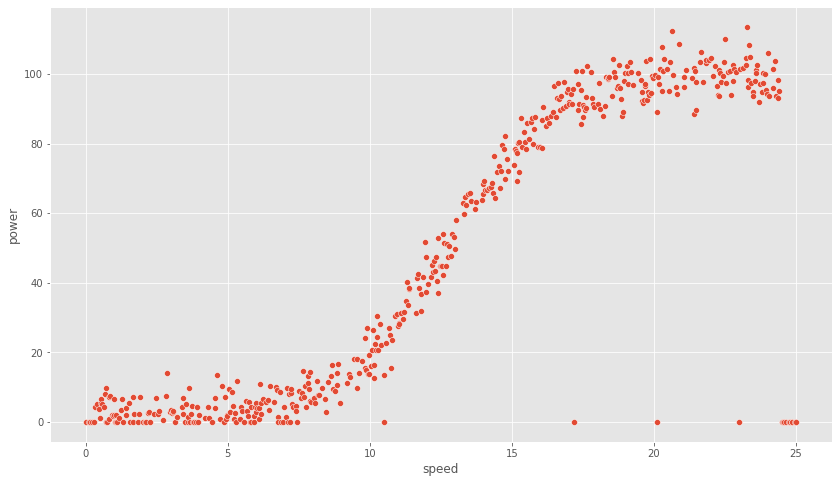

In [6]:
# plot using seaborn scatterplot
sns.scatterplot(x = "speed", y = "power", data = df)

Based on the plot, it looks like there is a linear relatioship between speed and power. The higher the wind, the higher the power. However, in some observations where the speed is over 10, the power is 0. This can have a lot of reasons like recording errors, failures, maintenance etc. As outliers can skew statistical measures and data distributions, we should remove them from dataset.

In [7]:
# Count how many observations have power = 0 and speed > 10 (outliers)
df[(df.power == 0) & (df.speed >= 10)].count()

speed    14
power    14
dtype: int64

In [8]:
# Remove outliers from dataset
df = df.drop(df.loc[(df.power == 0) & (df.speed >= 10)].index)
df.count()

speed    486
power    486
dtype: int64

In [9]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


I decided to remove 14 observations from the dataset. The observations are outliers, where the speed was higher than 10 and the power was 0. There is 486 observations in the dataset now. The column speed has values between 0 to 24.399, and the column power has values between 0 to 113.556.

In [10]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(486, 1) (486,)
(388, 1) (98, 1) (388,) (98,)


Split the dataset into train set and test set. There is 388 observations in the train dataset and 98 observations in the test dataset. 

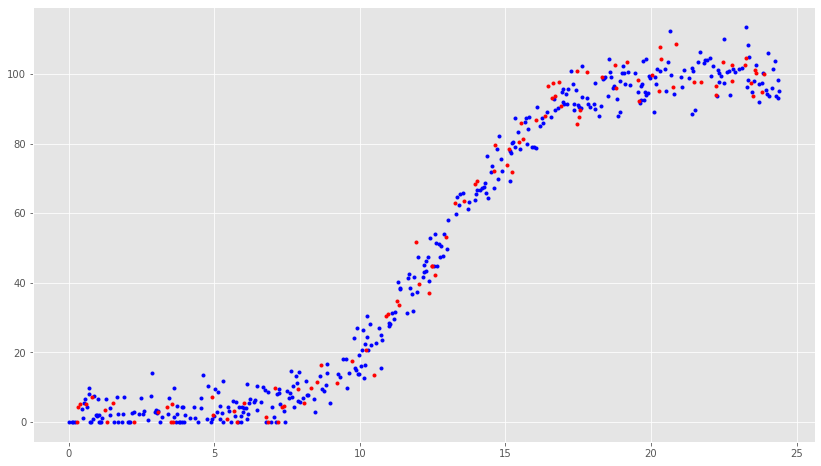

In [11]:
# Plot the train and test dataset
# train set- blue color
plt.plot(X_train, y_train, '.b')
#test set-red color
plt.plot(X_test, y_test, '.r')

## Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.[1]

In [12]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(data)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.812e+33
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:30:54   Log-Likelihood:                 14777.
No. Observations:                 486   AIC:                        -2.955e+04
Df Residuals:                     483   BIC:                        -2.954e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.809e-14    1.7e-15    -16.478      0.0

## Regression in keras

### Linear regression


To find the relationship between speed and power, we can use regression. *Linear regression* uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.[2]

In [13]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [14]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 1ms/step - loss: 2542.2201
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 2658.1142
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 2581.9844
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 2343.1127
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 2455.2136
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 2282.8168
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 2447.9106
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 2145.3124
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 2225.2565
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 2407.8425
Epoch 11/500
13/13 [==============================] - 0s 2ms/step - loss: 2464.3620
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 2149.4016
E

13/13 [==============================] - 0s 2ms/step - loss: 1296.5967
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 1201.2500
Epoch 100/500
13/13 [==============================] - 0s 2ms/step - loss: 1159.5156
Epoch 101/500
13/13 [==============================] - 0s 1ms/step - loss: 1214.7954
Epoch 102/500
13/13 [==============================] - 0s 2ms/step - loss: 1085.8045
Epoch 103/500
13/13 [==============================] - 0s 2ms/step - loss: 1206.9382
Epoch 104/500
13/13 [==============================] - 0s 2ms/step - loss: 1090.9898
Epoch 105/500
13/13 [==============================] - 0s 2ms/step - loss: 1124.1864
Epoch 106/500
13/13 [==============================] - 0s 2ms/step - loss: 1118.0391
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 1200.8844
Epoch 108/500
13/13 [==============================] - 0s 2ms/step - loss: 1134.3937
Epoch 109/500
13/13 [==============================] - 0s 2ms/step - loss: 1113.

13/13 [==============================] - 0s 2ms/step - loss: 562.1730
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 532.5473
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 555.6408
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 531.0198
Epoch 199/500
13/13 [==============================] - 0s 2ms/step - loss: 545.6727
Epoch 200/500
13/13 [==============================] - 0s 2ms/step - loss: 521.0481
Epoch 201/500
13/13 [==============================] - 0s 2ms/step - loss: 522.7124
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 530.4441
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 538.1780
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 551.6057
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 499.4942
Epoch 206/500
13/13 [==============================] - 0s 2ms/step - loss: 506.6092
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 351.2187
Epoch 293/500
13/13 [==============================] - 0s 2ms/step - loss: 327.2819
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 316.5174
Epoch 295/500
13/13 [==============================] - 0s 2ms/step - loss: 320.9822
Epoch 296/500
13/13 [==============================] - 0s 2ms/step - loss: 299.7567
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 328.5138
Epoch 298/500
13/13 [==============================] - 0s 2ms/step - loss: 332.4662
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 303.7135
Epoch 300/500
13/13 [==============================] - 0s 2ms/step - loss: 305.5313
Epoch 301/500
13/13 [==============================] - ETA: 0s - loss: 373.941 - 0s 2ms/step - loss: 343.6255
Epoch 302/500
13/13 [==============================] - 0s 2ms/step - loss: 338.6233
Epoch 303/500
13/13 [==============================] - 0s 2ms/st

13/13 [==============================] - 0s 2ms/step - loss: 254.1748
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 295.8517
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 277.8845
Epoch 392/500
13/13 [==============================] - 0s 2ms/step - loss: 276.1670
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 282.1745
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 294.6996
Epoch 395/500
13/13 [==============================] - 0s 2ms/step - loss: 281.5514
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 271.0801
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 281.0040
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 268.5546
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 273.0112
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 250.2124
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 248.2977
Epoch 487/500
13/13 [==============================] - 0s 1ms/step - loss: 263.1842
Epoch 488/500
13/13 [==============================] - 0s 1ms/step - loss: 277.8495
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 257.6179
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 263.9070
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 268.4307
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 253.6932
Epoch 493/500
13/13 [==============================] - 0s 2ms/step - loss: 246.9528
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 262.2536
Epoch 495/500
13/13 [==============================] - 0s 2ms/step - loss: 264.3284
Epoch 496/500
13/13 [==============================] - 0s 2ms/step - loss: 250.1180
Epoch 497/500
13/13 [==============================] - 0s 1ms/step - loss: 266.5975
Epoch 

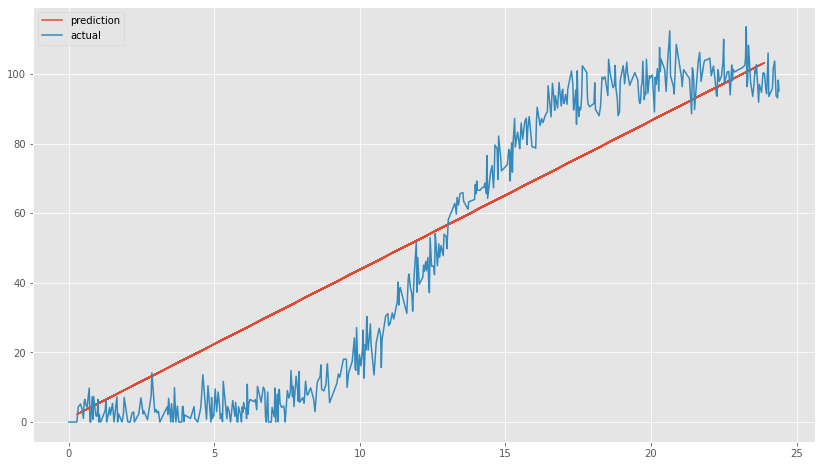

In [15]:
# Let's plot our predictions of the x values we trained on
plt.plot(X_test, model.predict(X_test), label='prediction') 
plt.plot(X, y, label = 'actual')
plt.legend()

In [16]:
model.predict([15.0])

array([[65.16007]], dtype=float32)

The model predicts that when the speed is 15, the power is 65.17.

In [17]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 274.8186


274.8185729980469

The plot and the evaluation are both showing that this dataset is a bad fit for linear regression.

### Polynomial

In [18]:
# Train a model with sigmoid activation function and linear activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [19]:
# Train the neural network on our training data.
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 4075.7111
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 3985.9425
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 3851.5569
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 3882.2767
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 3755.2449
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 3684.4393
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 3687.1174
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 3713.6602
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 3595.8388
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 3375.4986
Epoch 11/500
13/13 [==============================] - 0s 2ms/step - loss: 3729.6229
Epoch 12/500
13/13 [==============================] - 0s 2ms/step - loss: 3445.6900
E

13/13 [==============================] - 0s 2ms/step - loss: 1174.9414
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 1167.4447
Epoch 100/500
13/13 [==============================] - 0s 2ms/step - loss: 1170.4666
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 1155.2485
Epoch 102/500
13/13 [==============================] - 0s 2ms/step - loss: 1073.7486
Epoch 103/500
13/13 [==============================] - 0s 2ms/step - loss: 1133.0359
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 1157.6637
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 1066.5240
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 1068.1193
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 1011.7663
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 1050.9685
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 1008.

13/13 [==============================] - 0s 2ms/step - loss: 379.6964
Epoch 196/500
13/13 [==============================] - 0s 2ms/step - loss: 368.7777
Epoch 197/500
13/13 [==============================] - 0s 2ms/step - loss: 373.5157
Epoch 198/500
13/13 [==============================] - 0s 1ms/step - loss: 357.6938
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 337.2324
Epoch 200/500
13/13 [==============================] - 0s 2ms/step - loss: 327.6782
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 349.0071
Epoch 202/500
13/13 [==============================] - 0s 2ms/step - loss: 327.0540
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 333.9305
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 308.0162
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 338.9419
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 335.1140
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 116.5935
Epoch 293/500
13/13 [==============================] - 0s 2ms/step - loss: 122.8354
Epoch 294/500
13/13 [==============================] - 0s 2ms/step - loss: 111.2072
Epoch 295/500
13/13 [==============================] - ETA: 0s - loss: 105.649 - 0s 2ms/step - loss: 113.9771
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - loss: 119.0582
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 112.1040
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 113.6265
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 109.6961
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 99.0378
Epoch 301/500
13/13 [==============================] - 0s 2ms/step - loss: 109.2509
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 106.4926
Epoch 303/500
13/13 [==============================] - 0s 1ms/ste

13/13 [==============================] - 0s 2ms/step - loss: 65.1118
Epoch 391/500
13/13 [==============================] - 0s 2ms/step - loss: 59.1254
Epoch 392/500
13/13 [==============================] - 0s 2ms/step - loss: 61.3425
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 63.8448
Epoch 394/500
13/13 [==============================] - 0s 2ms/step - loss: 62.7604
Epoch 395/500
13/13 [==============================] - 0s 2ms/step - loss: 68.1486
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 61.8967
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 61.4406
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 60.0169
Epoch 399/500
13/13 [==============================] - 0s 2ms/step - loss: 59.7714
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 59.1023
Epoch 401/500
13/13 [==============================] - 0s 2ms/step - loss: 64.3915
Epoch 402/500
13/1

13/13 [==============================] - 0s 2ms/step - loss: 47.0058
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 49.0237
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 47.2255
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 49.9069
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 47.9332
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 47.6587
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 50.9540
Epoch 495/500
13/13 [==============================] - 0s 2ms/step - loss: 46.4419
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 51.9187
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - loss: 48.7906
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 45.8064
Epoch 499/500
13/13 [==============================] - 0s 2ms/step - loss: 49.5782
Epoch 500/500
13/1

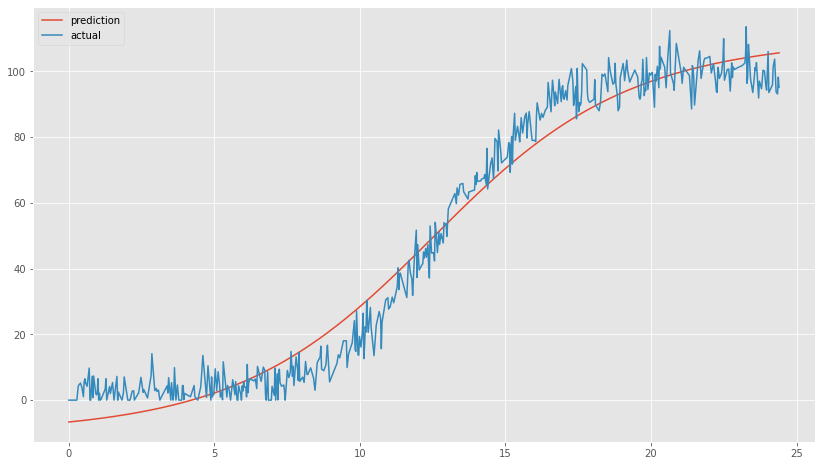

In [20]:
# Plot the predictions vs actual data.
plt.plot(X, model.predict(X), label='prediction')
plt.plot(X, y, label='actual')
plt.legend()

In [21]:
model.predict([15.0])

array([[70.44276]], dtype=float32)

The model predicts that when the speed is 15, the power is 71.33.

In [22]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 58.9349


58.934879302978516

### Accuracy

*The mean_squared_error* function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. The parameter squared = false returns the RMSE value. The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. [3]

The *r2_score* function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.[4]

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(y, model.predict(y), squared=False)
r2 = r2_score(y, model.predict(y))

print('RMSE: ', rmse)
print('R2 score: ', r2)

RMSE:  33.04031727465948
R2 score:  0.3615157039002861


This model is much better than the previous one. The loss is lower than when using only linear regression. 

## References

[1] https://www.statsmodels.org/stable/index.html

[2] https://www.w3schools.com/python/python_ml_linear_regression.asp

[3] https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models

[4] https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error